In [1]:
import tensorflow as tf
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [2]:
# Loading the data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [3]:
# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

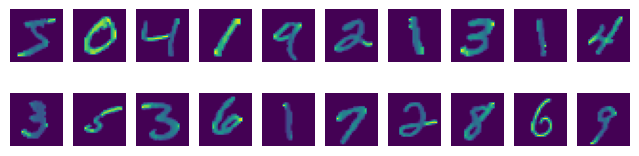

In [4]:

fig, axes = plt.subplots(2, 10, figsize=(8, 2))

for i in range(20):
    row = i // 10
    col = i % 10
    arr = axes[row, col] 
    arr.imshow(X_train[i])
    arr.axis('off')  

plt.show()

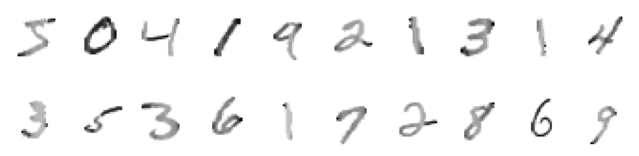

In [5]:

fig, axes = plt.subplots(2, 10, figsize=(8, 2))

for i in range(20):
    row = i // 10
    col = i % 10
    arr = axes[row, col] 
    arr.imshow(X_train[i], cmap=plt.cm.binary)
    arr.axis('off')  

plt.show()

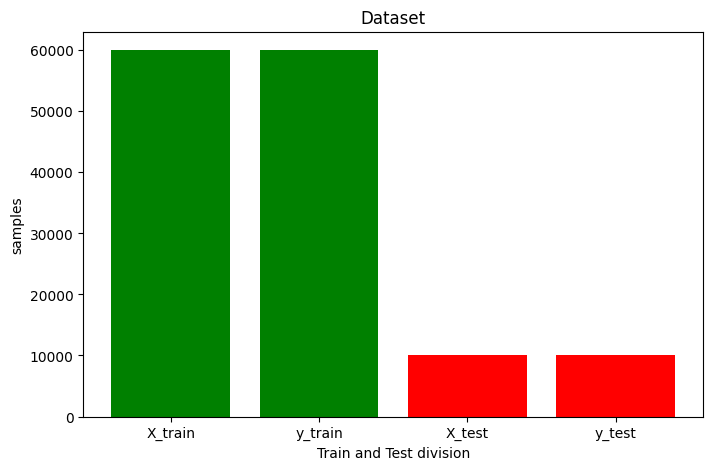

In [6]:

data = {
    "X_train": X_train.shape,
    "y_train": y_train.shape,
    "X_test": X_test.shape,
    "y_test": y_test.shape
}
colors = ['green' if 'train' in key else 'red' for key in data.keys()]
fig, arr = plt.subplots(figsize=(8, 5))
arr.bar(data.keys(), [shape[0] for shape in data.values()], color=colors)
arr.set_xlabel('Train and Test division')
arr.set_ylabel('samples')
arr.set_title('Dataset')

plt.show()


In [7]:
model = Sequential()

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Flatten())

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(26, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 71s 37ms/step - loss: 0.2219 - accuracy: 0.9344
Epoch 2/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0648 - accuracy: 0.9800
Epoch 3/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0463 - accuracy: 0.9861
Epoch 4/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0369 - accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0282 - accuracy: 0.9910


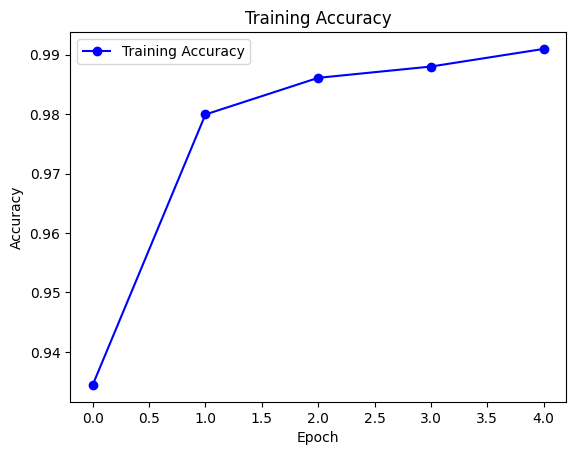

In [10]:

plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', markersize=6, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()


plt.show()

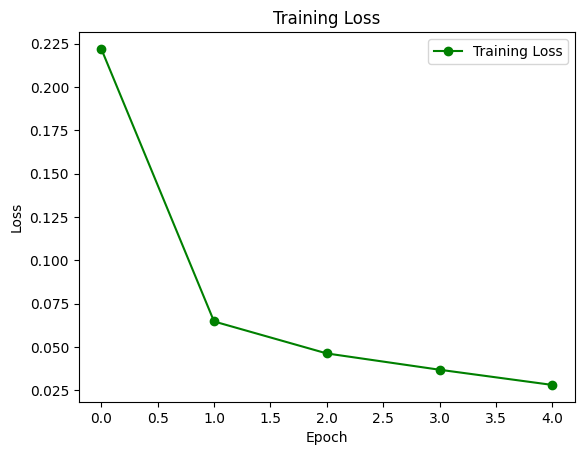

In [11]:
plt.plot(history.history['loss'], label='Training Loss', marker='o', markersize=6, color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 4s - loss: 0.0433 - accuracy: 0.9861 - 4s/epoch - 12ms/step

Test accuracy: 0.9861000180244446


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 activation (Activation)     (None, 26, 26, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    